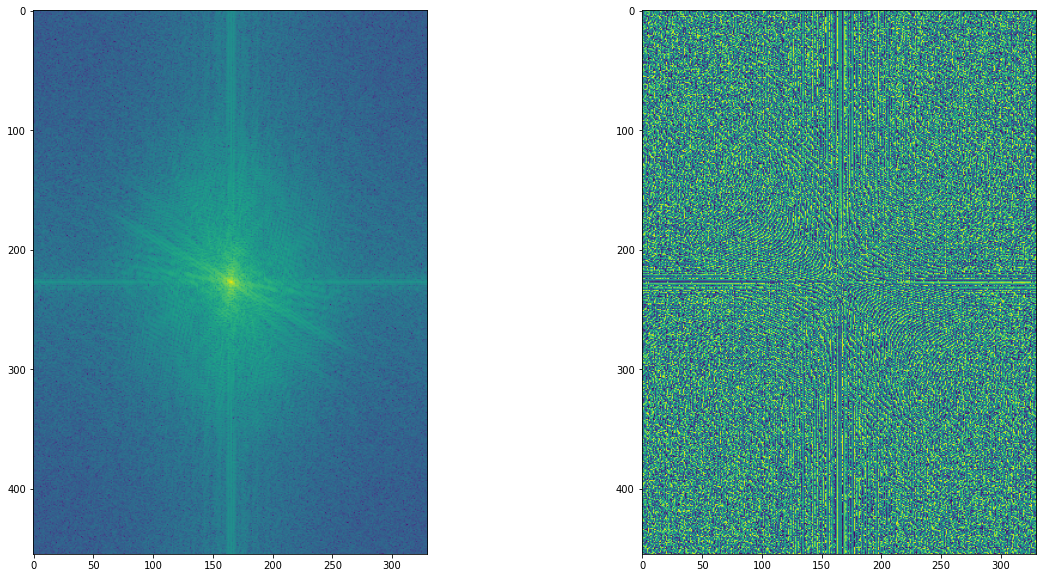

In [40]:
import torchvision.transforms as T
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)
        
path="/mnt/disk1/doan/phucnp/Graduation_Thesis/my_thesis/forensics/preprocess_data/out/Tom Holland in Spider-Man (2004) [DeepFake]_0.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)
img = np.array(img)

fft = np.fft.fft2(img)
fft_shift = np.fft.fftshift(fft)

mag = 20 * np.log(np.abs(fft_shift))
phase = np.angle(fft_shift)

plt.figure(figsize= (20, 10))
plt.subplot(1, 2, 1)
plt.imshow(mag)
plt.subplot(1, 2, 2)
plt.imshow(phase)
plt.show()

In [5]:
import os
from glob import glob
import shutil

def move():
    dest = "/mnt/disk1/doan/phucnp/Dataset/ff/video/manipulated_sequences/FaceSwap"
    src = "/mnt/disk1/doan/phucnp/Dataset/ff/video/manipulated_sequences/Face2Face/c23/videos"
    videos = glob(os.path.join(src, '*'))
    for v in videos:
        basename = os.path.basename(v)
        video_idx = int(basename.split('_')[0])
        if video_idx < 200:
            os.mkdir(os.path.join(dest, "test"))
            shutil.move(v, os.path.join(dest, "test"))
        elif video_idx < 1000:
            os.mkdir(os.path.join(dest, "train"))
            shutil.move(v, os.path.join(dest, "train"))
        else:
            print("error in video: ", v)
            
            
move()